In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
worldcup_df = pd.read_csv("data/WorldCupShootout.csv")
euro_df = pd.read_csv("data/EuroShootout.csv")
copa_df = pd.read_csv("data/CopaAmericaShootout.csv")


In [4]:
combined_df = pd.concat([worldcup_df,euro_df,copa_df])

In [5]:
combined_df["FirstShooterWon"] = combined_df['First Shooter'] == combined_df['Winner']

In [6]:
combined_df

,Winner,FT,Loser,First Shooter,FirstShooterWon
0,West Germany,3–3,France,France,False
1,France,1–1,Brazil,Brazil,False
2,West Germany,0–0,Mexico,West Germany,True
3,Belgium,1–1,Spain,Spain,False
4,Republic of Ireland,0–0,Romania,Romania,False
...,...,...,...,...,...
28,Argentina,1–1,Colombia,Colombia,False
29,Argentina,1–1,Ecuador,Argentina,True
30,Canada,1–1,Venezuela,Venezuela,False
31,Uruguay,0–0,Brazil,Uruguay,True


In [7]:
first_shooter_won = combined_df["FirstShooterWon"].sum()

In [8]:
second_shooter_won = (~combined_df["FirstShooterWon"]).sum()

In [9]:
print(f"Number of times first shooter won:  {first_shooter_won}")

Number of times first shooter won:  46


In [10]:
print(f"Number of times second shooter won:  {second_shooter_won}")

Number of times second shooter won:  47


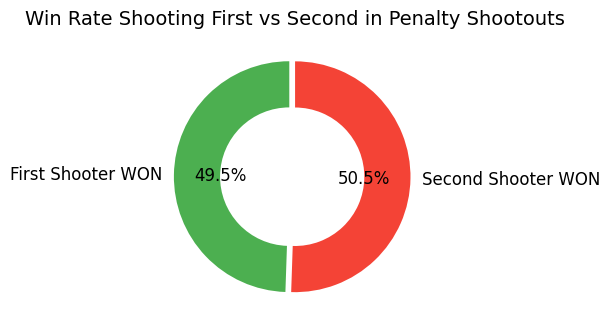

In [15]:

win_rate = combined_df['FirstShooterWon'].mean()

labels = ['First Shooter WON', 'Second Shooter WON']
sizes = [win_rate, 1 - win_rate]
colors = ['#4CAF50', '#F44336']
explode = (0.05, 0)

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'width': 0.4},
    textprops={'fontsize': 12}
)

ax.set(aspect="equal")

plt.title("Win Rate Shooting First vs Second in Penalty Shootouts", fontsize=14)
plt.tight_layout()
plt.savefig('my_plot.png',dpi=1000)

plt.show()
